# Introduction

## OCR Pipeline Exploration with Digital Image Processing

This notebook explores an Optical Character Recognition (OCR) pipeline using various digital image processing techniques. 
We will preprocess images, run OCR to recognize text, and evaluate the accuracy of the recognized text. 

# Import Necessary Libraries and Modules

In [2]:
import os
import pickle
import random
import sys

import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from ipywidgets import interact

part1_dir = os.path.join(os.getcwd(), '..')
sys.path.insert(0, part1_dir)
src_dir = os.path.join(part1_dir, 'src')
sys.path.insert(0, src_dir)

from src.preprocess import preprocess_image, load_image, reduce_noise, apply_threshold, morphological_operations
from src.ocr import ocr_pipeline, display_image
from src.evaluate import calculate_accuracy, load_labels, load_predictions

# Load and Display Sample Images

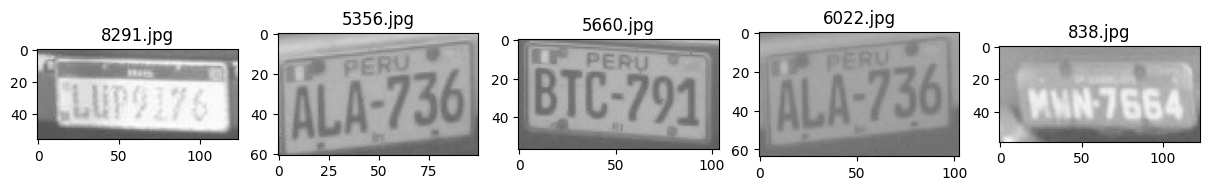

In [3]:
data_dir = os.path.join(part1_dir, "data/images/train")
sample_images = random.sample(os.listdir(data_dir), 5)

def display_sample_images(images):
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(images):
        image = load_image(os.path.join(data_dir, image_path))
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_path)
    plt.show()

display_sample_images(sample_images)

# Image Preprocessing

In [4]:
def preprocess_and_display(image_path, blur_kernel=5, threshold_method='otsu', morph_kernel=3):
    image_path = os.path.join(data_dir, image_path)
    image = load_image(image_path)
    image = reduce_noise(image, kernel_size=blur_kernel)
    image = apply_threshold(image, method=threshold_method)
    image = morphological_operations(image, kernel=morph_kernel)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap='gray')
    plt.title(f"Preprocessed Image: {os.path.basename(image_path)}")
    plt.show()

interact(preprocess_and_display, 
         image_path=sample_images,
         blur_kernel=(1, 15, 2),
         threshold_method=['otsu', 'adaptive'],
         morph_kernel=(1, 15, 2))

interactive(children=(Dropdown(description='image_path', options=('8291.jpg', '5356.jpg', '5660.jpg', '6022.jp…

<function __main__.preprocess_and_display(image_path, blur_kernel=5, threshold_method='otsu', morph_kernel=3)>

# Perform OCR

In [16]:
def perform_ocr_on_samples(images, blur_kernel=5, threshold_method='otsu', morph_kernel=3):
    predictions = {}
    for image_path in images:
        image_path = os.path.join(data_dir, image_path)
        preprocessed_image = preprocess_image(image_path, blur_kernel=blur_kernel, threshold_method=threshold_method, morph_kernel=morph_kernel)
        prediction = ocr_pipeline(preprocessed_image)
        predictions[image_path] = prediction
        
    for image_path, prediction in predictions.items():
        filename = os.path.basename(image_path).split('.')[0]
        print(f"Image: {filename} -> Predicted Text: {prediction}")

perform_ocr_on_samples(sample_images, 7, 'adaptive', 1)

Image: 8291 -> Predicted Text: AAABA
Image: 5356 -> Predicted Text: AAAA
Image: 5660 -> Predicted Text: AAAA
Image: 6022 -> Predicted Text: AAA
Image: 838 -> Predicted Text: AA


# Conclusion
We have explored the OCR pipeline with various preprocessing steps and hyperparameters. 
You can see how changes in the preprocessing phase affect the OCR results. 
Further improvements could be made by using more sophisticated machine learning models for character classification or fine-tuning the hyperparameters.
"""